<a href="https://colab.research.google.com/github/NitinKumar4338/Airbnb-data-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Importing Libraries

In [ ]:
# Let us begin with importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install emath@git+git://github.com/whitead/emoji-math.git
import folium as fl 

  Cloning git://github.com/whitead/emoji-math.git to /tmp/pip-install-4m5lgvol/emath_26e52f2b57ee4904a3f40500f234a2cb
  Running command git clone -q git://github.com/whitead/emoji-math.git /tmp/pip-install-4m5lgvol/emath_26e52f2b57ee4904a3f40500f234a2cb
  Created wheel for emath: filename=emath-1.6-py3-none-any.whl size=3981 sha256=22df75cf3b282f1e339b633c636254219bcc5f268c9f49931d80a2be9ca7b955
  Stored in directory: /tmp/pip-ephem-wheel-cache-y3qnrnep/wheels/0b/40/ad/68375b55355701e949ffe6b7af33503d33dd1560ad27932635
Successfully built emath


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the csv file from drive

path = '/content/drive/MyDrive/AlmaBetter/Projects/Copy of Airbnb NYC 2019.csv'
air_df = pd.read_csv(path)

# Analysing the Dataset

In [ ]:
# Having a look on the top heads of the dataset.

air_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Having a look on the tail of the dataset.

air_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Information of Every Columns (Column Name, No.Of Non-Null Count, Dtype)

air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Checking the columns of the DataFrame

print(air_df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [ ]:
# Shape of the Dataset( Rows, Columns)

air_df.shape

(48895, 16)

In [ ]:
# Describing Data Summary

air_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Data Wrangling

## Removing null values

In [ ]:
air_df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Cleaning the Non-Null Entries 

air_df = air_df[~air_df['name'].isna()]
air_df = air_df[~air_df['host_name'].isna()]
air_df = air_df[~air_df['last_review'].isna()]

In [ ]:
# Null values removed

air_df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## changing Dtype of last review

In [ ]:
# importing date-time library to change dtype of last_review

from datetime import datetime
from datetime import date

In [ ]:
air_df['last_review'] = air_df['last_review'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
# checking the Dtype of last review

air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  float64       
 7   longitude                       38821 non-null  float64       
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 10  minimum_nights                  38821 non-null  int64         
 11  nu

## Fixing Invalid Data

In [ ]:
air_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# In the above dataframe we can see that the min.price & min.availability_365 is zero which is invalid, so we have to fix this problem.

air_df.loc[air_df['price']==0, 'price'] = air_df.loc[air_df['price']!=0, 'price'].mean()
air_df.loc[air_df['availability_365']==0, 'availability_365']= air_df.loc[air_df['availability_365']!=0,'availability_365'].mean()

In [ ]:
# Invalid data has been fixed

air_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.369199,5.869220,29.290255,1.373229,5.166611,170.580624
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.981507,17.389026,48.182900,1.680328,26.302954,101.878988
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,1.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,89.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,170.580624
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Removing the Duplicates

In [ ]:
# Dropping The Duplicates 
air_df.drop_duplicates(subset='name',inplace=True)
air_df.nunique()

id                                38253
name                              38253
host_id                           29874
host_name                          9793
neighbourhood_group                   5
neighbourhood                       218
latitude                          17324
longitude                         13557
room_type                             3
price                               580
minimum_nights                       89
number_of_reviews                   393
last_review                        1760
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## Outliers Handling

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


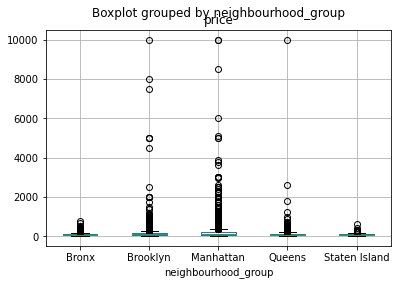

In [ ]:
# Price Columns' outliers is present in all 5 neighbourhood groups
# ( " we can see no.of neighbourhood grourps above in Duplicate Removal section in nunique values " )

air_df.boxplot(by ='neighbourhood_group', column = ['price'], grid = True)

In [ ]:
air_df.drop(air_df[air_df['price']>=400].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


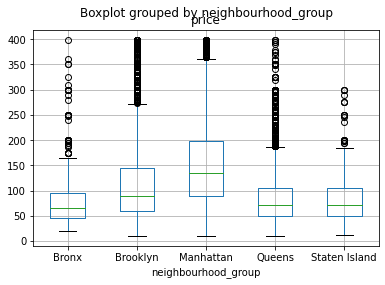

In [ ]:
air_df.boxplot(by ='neighbourhood_group', column =['price'], grid = True)

In [ ]:
# Removing Outlier Prices In Bronx Neighbourhood Groups 

air_df.drop(air_df[(air_df['neighbourhood_group']=='Bronx')&(air_df['price']>138)].index,inplace=True)

In [ ]:
# Removing Outlier Prices In Brooklyn Neighbourhood Groups 

air_df.drop(air_df[(air_df['neighbourhood_group']=='Brooklyn')&(air_df['price']>236)].index,inplace=True)

In [ ]:
# Removing Outlier Prices In Manhattan Neighbourhood Groups 

air_df.drop(air_df[(air_df['neighbourhood_group']=='Manhattan')&(air_df['price']>350)].index,inplace=True)

In [ ]:
#  Removing Outlier Prices In Queens Neighbourhood Groups 

air_df.drop(air_df[(air_df['neighbourhood_group']=='Queens')&(air_df['price']>173)].index,inplace=True)

In [ ]:
# Removing Outlier Prices In Staten Island Neighbourhood Groups 

air_df.drop(air_df[(air_df['neighbourhood_group']=='Staten Island')&(air_df['price']>173)].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


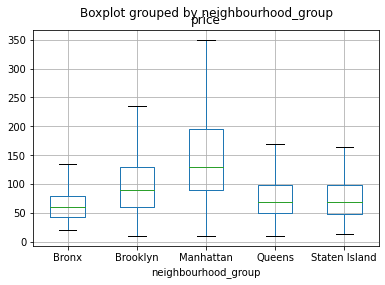

In [ ]:
# No Outliers remains

air_df.boxplot(by='neighbourhood_group',column='price',grid=True)

In [ ]:
# Shape of the dataset

air_df.shape

(35329, 16)

# Let's Have A Look On Map. 

In [ ]:
#creating a map
map =fl.Map(location=[40.730610,-73.935242],zoom_start=10)

In [ ]:
# new dataframe of locations of neighbourhood groups

locations =pd.DataFrame({'name':['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],'latitude':[40.837048,40.650002,40.754932, 40.742054,40.579021],'longitude':[-73.865433,-73.949997,-73.984016, -73.769417,-74.151535]})

In [ ]:
# adding markers of neighbourhood_groups to the maps
for row,col in locations.iterrows():
  fl.Marker(location=[col['latitude'],col['longitude']],popup=col['name'],tooltip='click to know name',icon=fl.Icon(color='black',icon_color="white",icon='tint',angle=2,prefix='fa')).add_to(map)


In [ ]:
#lets plot the map
map

Make this Notebook Trusted to load map: File -> Trust Notebook

So, the amalgamation of these 5 boroughs together form The New York City.


# No. of apartments in different neighbourhood_groups

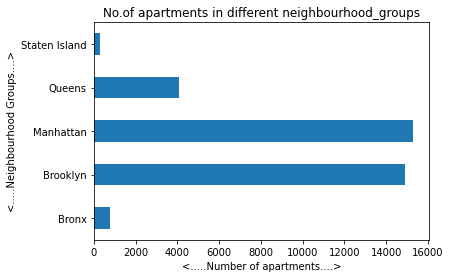

In [ ]:
air_df.groupby('neighbourhood_group')['name'].count().plot(kind='barh')
plt.title('No.of apartments in different neighbourhood_groups')
plt.ylabel('<.....Neighbourhood Groups....>')
plt.xlabel('<.....Number of apartments....>')
plt.show()

**Ranking of Neighbourhood Groups having the highest number of apartments**

1.Manhattan

2.Brooklyn

3.Queens

4.Bronx

5.Staten Island

# Price of apartments varying in different neighbourhood groups 

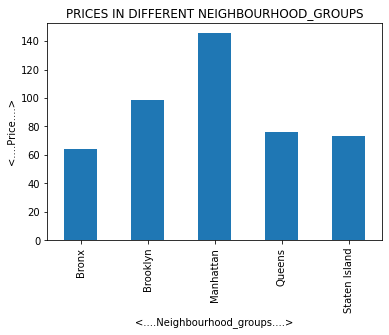

In [ ]:
air_df.groupby('neighbourhood_group')['price'].mean().plot.bar()
plt.title('PRICES IN DIFFERENT NEIGHBOURHOOD_GROUPS')
plt.xlabel('<....Neighbourhood_groups....>')
plt.ylabel('<....Price....>')
plt.show()

**Ranking of Neighbourhood Groups having the highest price for apartments**

1.Manhattan

2.Brooklyn

3.Queens

4.Staten Island

5.Bronx

# Percentage of room types in every neighbourhood groups 

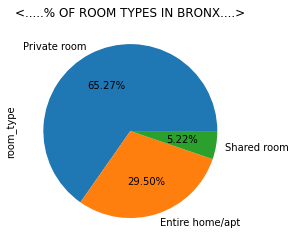

In [ ]:
#  Percentage of Room Types in Bronx 

bronx = air_df[air_df['neighbourhood_group']=='Bronx']
(bronx['room_type'].value_counts(normalize=True)*100).plot.pie(radius = 1, autopct = '%0.2f%%')
plt.title('<.....% OF ROOM TYPES IN BRONX....>')
plt.show()

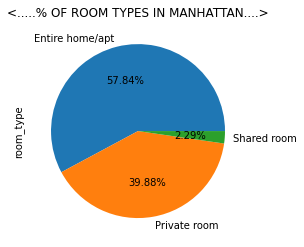

In [ ]:
#  Percentage of Room Types in Manhattan 

manhattan = air_df[air_df['neighbourhood_group']=='Manhattan']
(manhattan['room_type'].value_counts(normalize=True)*100).plot.pie(radius = 1, autopct = '%0.2f%%')
plt.title('<.....% OF ROOM TYPES IN MANHATTAN....>')
plt.show()

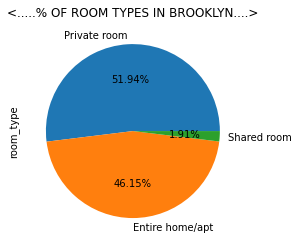

In [ ]:
# Percentage of Room Types in Brooklyn 

brooklyn = air_df[air_df['neighbourhood_group']=='Brooklyn']
(brooklyn['room_type'].value_counts(normalize=True)*100).plot.pie(radius = 1, autopct = '%0.2f%%')
plt.title('<.....% OF ROOM TYPES IN BROOKLYN....>')
plt.show()

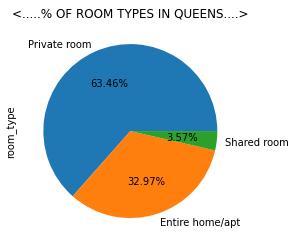

In [ ]:
# Percentage of Room Types in Queens 

queens = air_df[air_df['neighbourhood_group']=='Queens']
(queens['room_type'].value_counts(normalize=True)*100).plot.pie(radius = 1, autopct = '%0.2f%%')
plt.title('<.....% OF ROOM TYPES IN QUEENS....>')
plt.show()

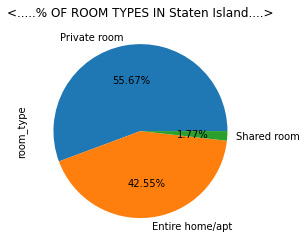

In [ ]:
# Percentage of Room Types in Staten Island 

statenisland = air_df[air_df['neighbourhood_group']=='Staten Island']
(statenisland['room_type'].value_counts(normalize=True)*100).plot.pie(radius = 1, autopct = '%0.2f%%')
plt.title('<.....% OF ROOM TYPES IN Staten Island....>')
plt.show()


## Plotting the Line Graph of all types of rooms in neightbourhood groups 

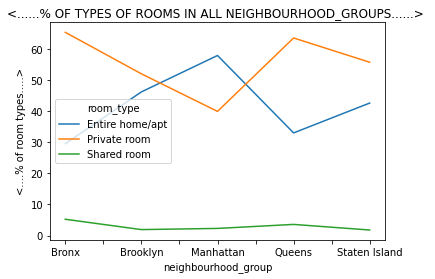

In [ ]:
(air_df.groupby('neighbourhood_group')['room_type'].value_counts(normalize=True)*100).unstack().plot()
plt.title('<......% OF TYPES OF ROOMS IN ALL NEIGHBOURHOOD_GROUPS......> ')
plt.ylabel('<....% of room types.....>')
plt.show()

# Prices of room types in different neighbourhood group individually 

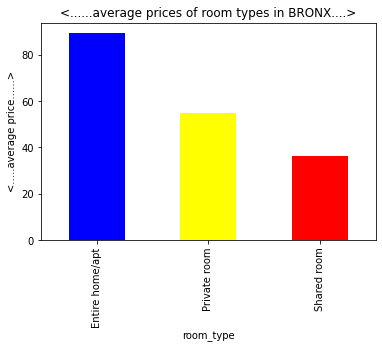

In [ ]:
# Prices in Bronx according to room types

APbronx= bronx.groupby('room_type')['price'].mean().plot.bar(color = ['blue', 'yellow', 'red'])
plt.title('<......average prices of room types in BRONX....>')
plt.ylabel('<.....average price......>')
plt.show()

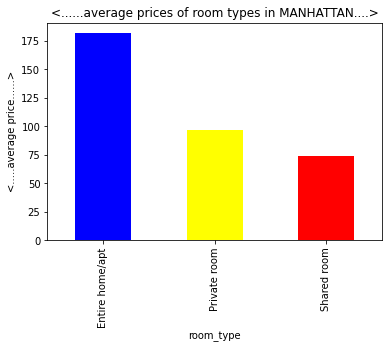

In [ ]:
# Prices in Manhattan

manhattan.groupby('room_type')['price'].mean().plot.bar(color=['blue','yellow','red'])
plt.title('<......average prices of room types in MANHATTAN....>')
plt.ylabel('<.....average price......>')
plt.show()

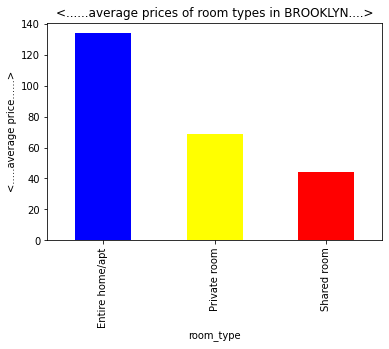

In [ ]:
# prices in Brooklyn

brooklyn.groupby('room_type')['price'].mean().plot.bar(color=['blue','yellow','red'])
plt.title('<......average prices of room types in BROOKLYN....>')
plt.ylabel('<.....average price......>')
plt.show()

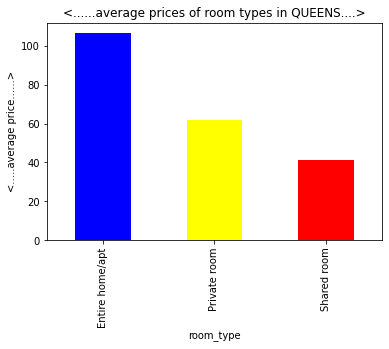

In [ ]:
#  Prices in Queens 

queens.groupby('room_type')['price'].mean().plot.bar(color=['blue','yellow','red'])
plt.title('<......average prices of room types in QUEENS....>')
plt.ylabel('<.....average price......>')
plt.show()

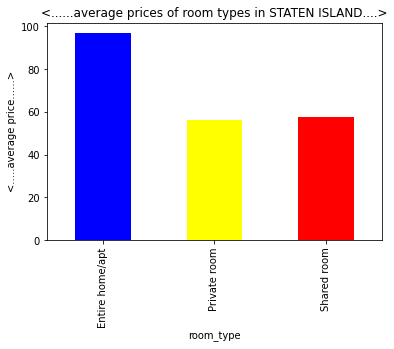

In [ ]:
#  Prices in Staten Island 

statenisland.groupby('room_type')['price'].mean().plot.bar(color=['blue','yellow','red'])
plt.title('<......average prices of room types in STATEN ISLAND....>')
plt.ylabel('<.....average price......>')
plt.show()

# Comparing the prices of room types for different neighborhood groups

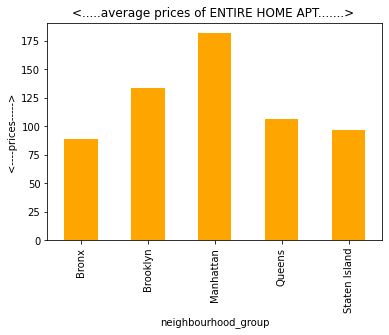

In [ ]:
# Prices Of Entire Home Apartment 

entirehome = air_df[air_df['room_type']=='Entire home/apt']
entirehome.groupby('neighbourhood_group')['price'].mean().plot.bar(color='orange')
plt.title('<.....average prices of ENTIRE HOME APT.......> ')
plt.ylabel('<----prices----->')
plt.show()

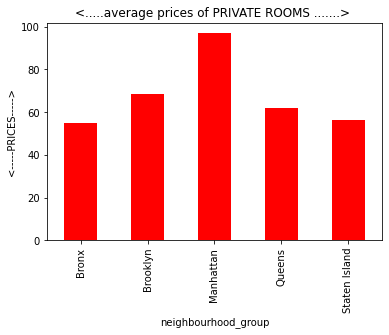

In [ ]:
# Prices Of Private Rooms 

privateroom=air_df[air_df['room_type']=='Private room']
privateroom.groupby('neighbourhood_group')['price'].mean().plot.bar(color='red')
plt.title('<.....average prices of PRIVATE ROOMS .......> ')
plt.ylabel('<-----PRICES----->')
plt.show()

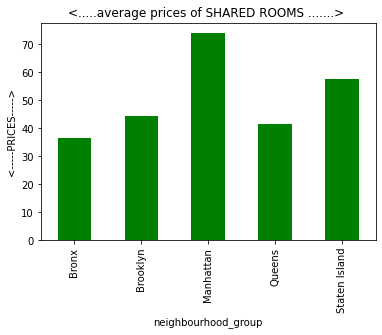

In [ ]:
# Prices Of Shared Rooms 

sharedroom = air_df[air_df['room_type']=='Shared room']
sharedroom.groupby('neighbourhood_group')['price'].mean().plot.bar(color='green')
plt.title('<.....average prices of SHARED ROOMS .......> ')
plt.ylabel('<-----PRICES----->')
plt.show()

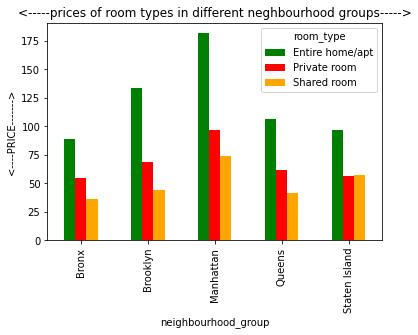

In [ ]:
# Final Comarision By Bar Graph 

air_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().plot.bar(color=['green','red','orange'])
plt.title('<-----prices of room types in different neghbourhood groups----->')
plt.ylabel('<----PRICE------->')
plt.show()

**From the above graph We can conclude the the prices in Manhattan are very much high in comparison to other neighbourhood groups.**

# Room type people prefer the most for staying

room_type
Entire home/apt    129486
Private room        77170
Shared room          3617
Name: minimum_nights, dtype: int64


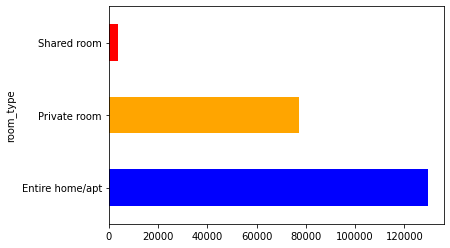

In [ ]:
most_stayed_rooms = air_df.groupby('room_type')['minimum_nights'].sum()
print(most_stayed_rooms)
most_stayed_rooms.plot.barh(color=['blue','orange','red'])
plt.show()

**From the above graph we have come to conclusion that people prefer Entire home/Apartment then private rooms & shared rooms and we get insights that people choose Comfort & Privacy over Low Price Rooms**

# Neighborhood Group which got the most no. of visitors

neighbourhood_group
Bronx              3113
Brooklyn          79806
Manhattan        108657
Queens            17758
Staten Island       939
Name: minimum_nights, dtype: int64


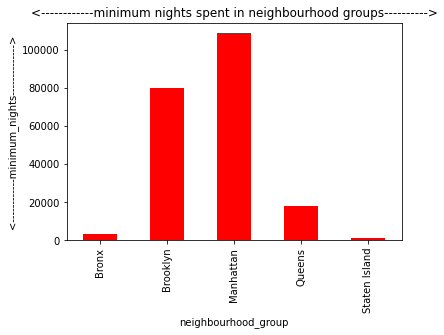

In [ ]:
print(air_df.groupby('neighbourhood_group')['minimum_nights'].sum())
air_df.groupby('neighbourhood_group')['minimum_nights'].sum().plot.bar(color='red')
plt.title('<------------minimum nights spent in neighbourhood groups---------->')
plt.ylabel('<------------minimum_nights-------------->')
plt.show()

**The maximum no of people like to stay in Manhattan & Brookyln**

# Correlation between price, minimum nights & no. of review

                      price  minimum_nights  number_of_reviews
price              1.000000        0.026576          -0.019324
minimum_nights     0.026576        1.000000          -0.071633
number_of_reviews -0.019324       -0.071633           1.000000


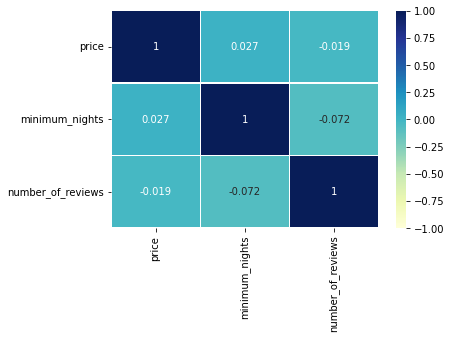

In [ ]:
heat_map = air_df.loc[:,['price','minimum_nights','number_of_reviews']].corr()
print(heat_map)
sns.heatmap(heat_map,vmin= -1,annot=True, linewidth = 0.25,cmap="YlGnBu")

**In the above heatmap we can see that there is negative correlation between price and no. of reviews and also between minimum nights and no. of reviews**

# Adding a new Column 'Year' so it will help us to Group the Data Yearly.

In [ ]:
# let's make a fucntion first for converting the dtype from date to string so we can extract the first four letter i.e year
def extractyear(x):
   x=datetime.strftime(x,'%Y-%m-%d')
   return x[0:4]

In [ ]:
# making a new column called 'year' 

air_df['year'] = air_df['last_review'].apply(lambda x:extractyear(x))

In [ ]:
# let's have a overview of our data
air_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365.000000,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355.000000,2019
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194.000000,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,170.580624,2018
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129.000000,2019


# Availability of rooms in different 'neighbourhood_groups' Yearly

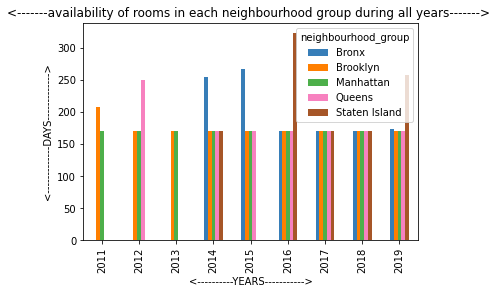

In [ ]:
air_df.groupby(['year','neighbourhood_group'])['availability_365'].median().unstack().plot.bar(color=['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00'])
plt.title('<-------availability of rooms in each neighbourhood group during all years-------> ')
plt.ylabel('<-------------DAYS------------->')
plt.xlabel('<----------YEARS----------->')
plt.show()

**The above multiple grouped bar graph represents the availability of rooms in each neighbourhood group from year 2011 to 2019**

# Availability of different types of room Yearly

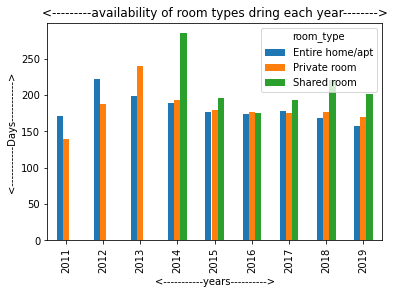

In [ ]:
room_available = air_df.groupby(['year','room_type'])['availability_365'].mean().unstack().plot.bar()
plt.title('<---------availability of room types dring each year-------->')
plt.ylabel('<-----------Days----------->')
plt.xlabel('<-----------years---------->')
plt.show()

**The above bar graph represents the availability of different room types during each year. From year 2011 to 2013 ,shared rooms were hardly available or there was no availability but in 2014 shared rooms were available for most of the days as compare to all the years , the Entire home/apt were available for most of the days in 2012 and Private rooms were available for most of the days in 2013.**

# In which year Airbnb recieves the most no. of reviews

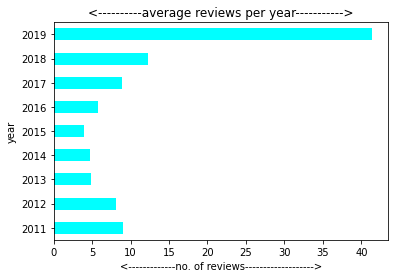

In [ ]:
air_df.groupby('year')['number_of_reviews'].mean().plot.barh(color='Aqua')
plt.title('<----------average reviews per year----------->')
plt.xlabel('<-------------no. of reviews------------------->')
plt.show()


**The above horizontal bar graph shows that Airbnb gets the most no. of reviews in year 2019 and least no. of reviews in 2015**

# Which year brought the most no. of visitors

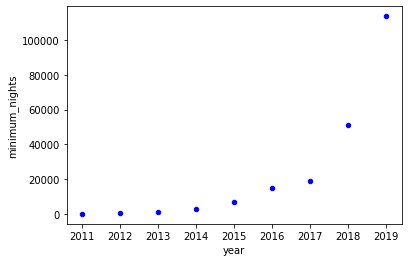

In [ ]:
air_df.groupby('year')['minimum_nights'].sum().reset_index().plot.scatter(x='year',y='minimum_nights',color='blue')
plt.show()

**In the above scatter plot, we can clearly see the positive correlation between the years and the minimum_nights. As the years increases from 2011 to 2019,the no.s of minimum nights also increases**

#Price fluctuation of each room type around the year

## Price of Entire House/Apt around the year

In [ ]:
# saving the data into new variable according to a particular room type

entire = air_df[air_df['room_type']=='Entire home/apt']
private = air_df[air_df['room_type']=='Private room']
shared = air_df[air_df['room_type']=='Shared room']

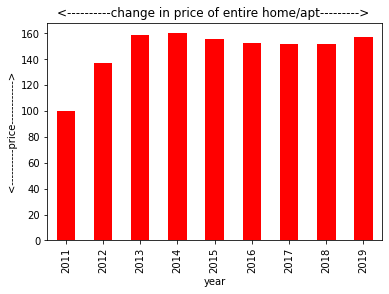

In [ ]:
#price fluctuation of Entire home/apt during each year

entire.groupby('year')['price'].mean().plot.bar(color='Red')
plt.title('<----------change in price of entire home/apt---------> ')
plt.ylabel('<----------price------------>')
plt.show()

## Price of Private rooms around the year

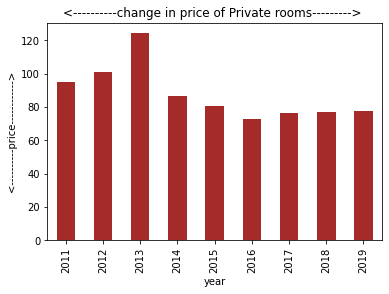

In [ ]:
private.groupby('year')['price'].mean().plot.bar(color='brown')
plt.title('<----------change in price of Private rooms---------> ')
plt.ylabel('<----------price------------>')
plt.show()

**In 2011 the prices of private rooms were highest i.e upto 140 and from 2014 the prices were almost same all the years i.e between 60 to 80.**

## Price of Shared rooms around the year

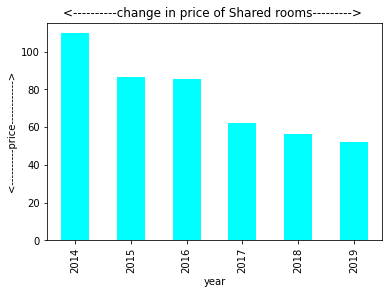

In [ ]:
# prices of shared room during each year

shared.groupby('year')['price'].mean().plot.bar(color='aqua')
plt.title('<----------change in price of Shared rooms---------> ')
plt.ylabel('<----------price------------>')
plt.show()

**As we can see in above bar graph it is showing the data from year 2014 because the shared rooms were introduced by Airbnb from 2014**

## Price change of room types every year in group bar

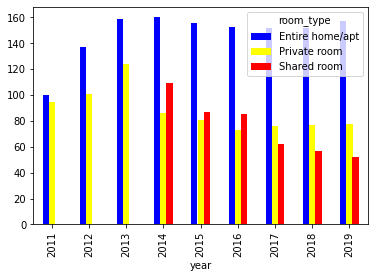

In [ ]:
air_df.groupby(['year','room_type'])['price'].mean().unstack().plot.bar(color=['blue','yellow','red'])
plt.show()

#Which room types people prefer around the different months

In [ ]:
# first of all we will make a function ,so we could extract only months from column last_review whose dtype is datetime

def tomonth(x):
  x=datetime.strftime(x,'%Y-%m-%d')
  return x[5:7]

In [ ]:
# adding a new column od month to dataframe

air_df['month'] = air_df['last_review'].apply(lambda x:tomonth(x))

In [ ]:
air_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year,month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365.000000,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355.000000,2019,05
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194.000000,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,170.580624,2018,11
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1,129.000000,2019,06


## For Entire House/Apt

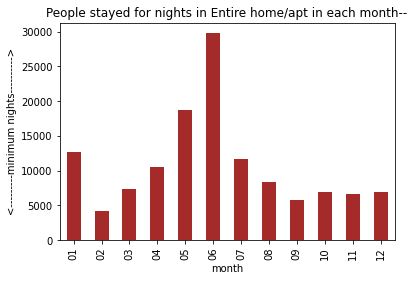

In [ ]:
entire = air_df[air_df['room_type']=="Entire home/apt"]
entire.groupby('month')['minimum_nights'].sum().plot.bar(color='brown')
plt.title('People stayed for nights in Entire home/apt in each month--')
plt.ylabel('<---------minimum nights---------->')

plt.show()

**According to data people have stayed for most no. of nights in Entire home/apt in the month of June.**

## For Private rooms

In [ ]:
private = air_df[air_df['room_type']=='Private room']

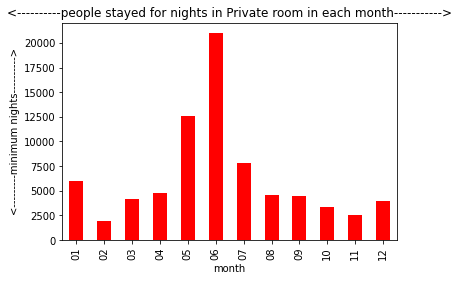

In [ ]:
private.groupby('month')['minimum_nights'].sum().plot.bar(color='red')
plt.title('<----------people stayed for nights in Private room in each month----------->')
plt.ylabel('<---------minimum nights---------->')

plt.show()

**People have spent most number of nights in private rooms in the month of June**

## For Shared rooms

In [ ]:
shared = air_df[air_df['room_type']=='Shared room']

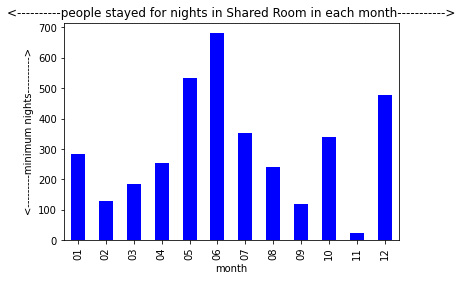

In [ ]:
shared.groupby('month')['minimum_nights'].sum().plot.bar(color='blue')
plt.title('<----------people stayed for nights in Shared Room in each month----------->')
plt.ylabel('<---------minimum nights---------->')
plt.show()


**In above graph we can see that people have stayed for most no. of nights in the month of June**

# Most no of active host in different neighbourhood group


## In Bronx :

In [ ]:
hostbronx = bronx.groupby(['host_id','host_name']).agg({'minimum_nights':'sum','availability_365':'mean','price':'mean','number_of_reviews':'mean'})

In [ ]:
hostbronx.sort_values('minimum_nights',ascending=False).head(5)

,,minimum_nights,availability_365,price,number_of_reviews
host_id,host_name,,,,
2988712,Sasha,630,159.285714,77.857143,6.428571
60501531,John,186,365.000000,79.000000,7.000000
32164030,Ikkyukim,90,321.000000,40.000000,18.333333
16151285,Carol,73,339.250000,59.500000,31.750000
1532337,Monica,64,124.250000,21.250000,3.000000


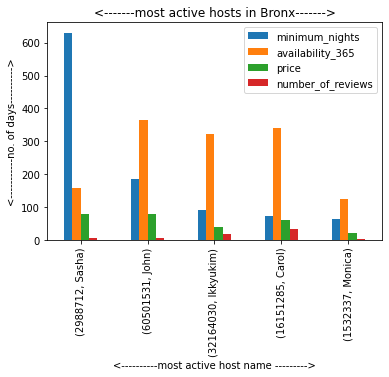

In [ ]:
hostbronx.sort_values('minimum_nights',ascending=False).head(5).plot.bar()
plt.title('<-------most active hosts in Bronx------->')
plt.ylabel('<-----------no. of days---------->')
plt.xlabel('<----------most active host name --------->')
plt.show()

**As we can see in above graph,it shows the most active no of host in Bronx . The above graph states the relationship of minimum_night with other factors such as availability of rooms ,price of rooms and number_of reviews**

## In Brooklyn :

In [ ]:
hostbrroklyn=brooklyn.groupby(['host_id','host_name']).agg({'minimum_nights':'sum','availability_365':'mean','price':'mean','number_of_reviews':'mean'})


In [ ]:
hostbrroklyn.sort_values('minimum_nights',ascending=False).head(10)

,,minimum_nights,availability_365,price,number_of_reviews
host_id,host_name,,,,
7503643,Vida,1470,308.942066,149.408163,4.938776
151084261,Angie,1149,295.666667,83.666667,14.000000
4185135,David,565,130.290312,212.000000,16.500000
16437254,Benjamin,540,308.611111,149.555556,4.888889
8996336,Laura,500,365.000000,50.000000,10.000000
26377263,Stat,452,256.687500,48.000000,2.062500
10992588,Joni,400,53.000000,121.000000,292.500000
4267075,Jen,379,256.790312,89.000000,2.500000
2798644,Alessandra,370,365.000000,115.000000,6.000000


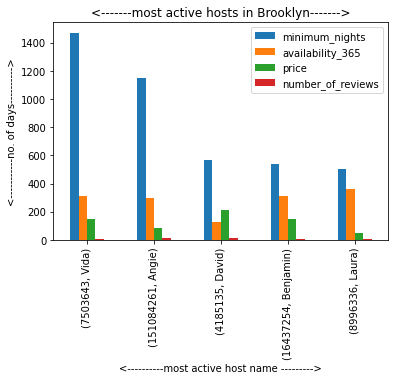

In [ ]:
hostbrroklyn.sort_values('minimum_nights',ascending=False).head(5).plot.bar()
plt.title('<-------most active hosts in Brooklyn------->')
plt.ylabel('<-----------no. of days---------->')
plt.xlabel('<----------most active host name --------->')
plt.show()

**In Brooklyn these are the top 5 active host ,whose room's availability was higher during each year and the people have stayed for most no. of nights in their apartments**

## In Manhattan :

In [ ]:
hostmanhattan=manhattan.groupby(['host_id','host_name']).agg({'minimum_nights':'sum','availability_365':'mean','price':'mean','number_of_reviews':'mean'})


In [ ]:
hostmanhattan.sort_values('minimum_nights',ascending=False).head(10)

,,minimum_nights,availability_365,price,number_of_reviews
host_id,host_name,,,,
61391963,Corporate Housing,2370,250.042057,144.620253,5.278481
7245581,Michael,2328,260.263158,88.789474,14.842105
16098958,Jeremy & Laura,1740,302.820356,188.448276,2.327586
1475015,Mike,1260,335.000000,102.785714,3.857143
17550546,Genevieve,1250,365.000000,180.000000,2.000000
2119276,Host,1170,279.150828,185.675676,8.675676
120762452,Stanley,1170,332.128205,165.205128,2.128205
30283594,Kara,1050,321.971429,210.685714,1.514286
2697686,Glenn H.,999,42.000000,99.000000,2.000000


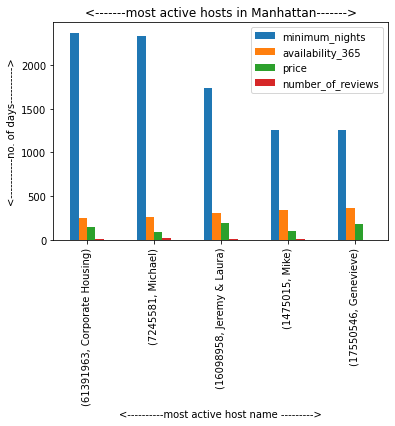

In [ ]:
hostmanhattan.sort_values('minimum_nights',ascending=False).head(5).plot.bar()
plt.title('<-------most active hosts in Manhattan------->')
plt.ylabel('<-----------no. of days---------->')
plt.xlabel('<----------most active host name --------->')
plt.show()

**In above graph of most active host in Manhattan,the night spent by people are higher and the reason behind this could be the availability of their apartments are higher as compare to other host and the negative correlation between price and minimum_night spend.**

## For Queens :

In [ ]:
hostqueens=queens.groupby(['host_id','host_name']).agg({'minimum_nights':'sum','availability_365':'mean','price':'mean','number_of_reviews':'mean'})

In [ ]:
hostqueens.sort_values('minimum_nights',ascending=False).head(10)


,,minimum_nights,availability_365,price,number_of_reviews
host_id,host_name,,,,
137358866,Kazuya,1080,225.786736,42.888889,1.500000
3680008,Aliya,500,90.000000,134.000000,30.000000
3250450,Petya,403,327.500000,38.571429,5.714286
19303369,Hiroki,334,30.870966,40.636364,1.818182
5962328,Alan,330,230.090909,110.727273,3.454545
242962235,Yuval,270,246.444444,40.000000,1.555556
200239515,Shogo,268,86.369166,36.222222,1.888889
864735,Jason,240,264.000000,100.000000,17.000000
2148881,Grace,180,170.580624,50.000000,69.000000


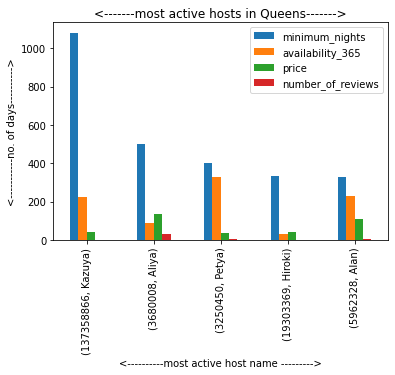

In [ ]:
hostqueens.sort_values('minimum_nights',ascending=False).head(5).plot.bar()
plt.title('<-------most active hosts in Queens------->')
plt.ylabel('<-----------no. of days---------->')
plt.xlabel('<----------most active host name --------->')
plt.show()


**In Queens these are the most active hosts,but if we compare all these 5 host,Kazuya has been most active host in this neighbourhood,there is huge difference between Kazuya and other 4 hosts.**

## For Staten Island :

In [ ]:
hoststaten=statenisland.groupby(['host_id','host_name']).agg({'minimum_nights':'sum','availability_365':'mean','price':'mean','number_of_reviews':'mean'})


In [ ]:
hoststaten.sort_values('minimum_nights',ascending=False).head(10)

,,minimum_nights,availability_365,price,number_of_reviews
host_id,host_name,,,,
32060911,Elvis,63,345.500000,40.000000,3.500000
3625735,Marianne,60,358.000000,75.000000,47.500000
128338539,Reuben,33,104.500000,55.500000,24.500000
9263105,Wj,33,40.500000,47.500000,1.000000
104812805,Amarjit S,32,318.375000,33.375000,21.000000
137114793,Nick,30,205.000000,91.000000,61.000000
139756559,Maria,30,129.000000,75.000000,3.000000
244217480,Vlad,30,316.000000,83.000000,3.000000
250580779,Viktoriya,30,170.580624,55.000000,2.000000


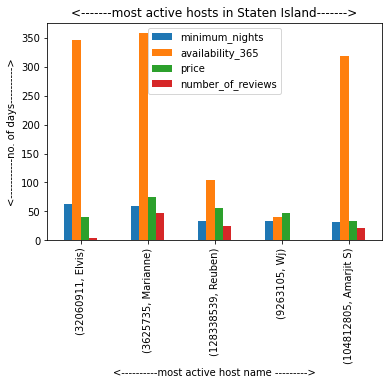

In [ ]:
hoststaten.sort_values('minimum_nights',ascending=False).head(5).plot.bar()
plt.title('<-------most active hosts in Staten Island------->')
plt.ylabel('<-----------no. of days---------->')
plt.xlabel('<----------most active host name --------->')
plt.show()

**In Staten Island the night spent by people are low as compare to other neighbourhood_groups.because the no. of apartment are less here**

# The End.........